## Background

**Data Link** : [link](https://www.kaggle.com/c/titanic/data) 

In this exercise, I will investigate the Titanic Data Set. The Data is obtained from Kaggle, and the sample set consists of the characteristics of passengers in the Titanic. 

I will be following the **Data Analysis Process** and based on the reading of the Data I came up with the below initial set of Questions 

1. How much did the class(Upper/Middle/Lower) affect the survival rate of the passenger
2. Does the fact that some passengers were travelling with siblings/parents impact the travel rate?
	- Was it more prominent for passengers travelling with siblings or,
	- Was it more prominent for passengers travelling with parents
3. Did young passengers survive more than the older passengers?
4. Did the cabin number where the passengers were put up, play a role in whether they survived or not. 



In [49]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Import the Titanic Data and Load a Sample 

passenger_df = pd.read_csv('P2 - Investigate a Dataset using Python/Data/train.csv')
passenger_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 1 Understand the Data + Data Cleansing + Readability Improvements 
This is a Data Set of **891** passengers

Data Dictionary

1. Passenger Id - Id of the Passenger
2. Survived - Showed if the Passenger Survived or Died
	- 0 = Died
	- 1 = Survived
3. Pclass - Class on which the passenger has travelled
	- 1 = 1st Class
	- 2 = 2nd Class
	- 3 = 3rd Class
4. Name - Name of the Passenger
5. Sex (Gender) of the Passenger 
	- male
	- femal
6. Age - Age of the Passenger (in Years) - See note
7. sibsp - 	# of siblings / spouses aboard the Titanic	
8. parch - 	# of parents / children aboard the Titanic	
9. ticket -	Ticket number	
10. fare -	Passenger fare	
11. cabin -	Cabin number	
12. embarked	Port of Embarkation	
	- C = Cherbourg, 
	- Q = Queenstown, 
	- S = Southampton

###Guiding Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
	- Sibling = brother, sister, stepbrother, stepsister
	- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
	- Parent = mother, father
	- Child = daughter, son, stepdaughter, stepson
	Some children travelled only with a nanny, therefore parch=0 for them.

In [27]:
# Printing a Basic Summary 
# Will give us an idea if any cleansing / wrangling is required
passenger_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [28]:
#Cleansing AGE - No Values can be substituted for the Age
# So we will take it out seperately so that we can look at it in isolation, and see if we can derive any insights. 
age_df = passenger_df['Age']
age_df =age_df.dropna()
print ("The No of Age Records is : ", age_df.count())
print (" The Mean is : ", age_df.mean())
age_df.describe()

('The No of Age Records is : ', 714)
(' The Mean is : ', 29.69911764705882)


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

###Data Cleansing is required in the Age, Cabin and Embarked Fields

In [29]:
#Data Cleansing for Embarked
print ("Values for Embarked : ", passenger_df['Embarked'].unique())
max_occuring_embarkation_point = %passenger_df['Embarked'].mode()
print ("The max occuring value for EMBARKED is %s, So We can replace it is that" %passenger_df['Embarked'].mode())

passenger_df['Embarked'].fillna(value="S",inplace=True)

ERROR:root:Line magic function `%passenger_df['Embarked'].mode()` not found.


('Values for Embarked : ', array(['S', 'C', 'Q', nan], dtype=object))
The max occuring value for EMBARKED is 0    S
dtype: object, So We can replace it is that


In [30]:
#Data Cleansing - for Passenger Class
def cleanse_data_replace_values(df):
    df.head()
    class_dict = {1:'UPPER', 2:'MIDDLE', 3:"LOWER"}
    df['Pclass'] =df['Pclass'].map(class_dict)

    #Data Cleansing for Survived
    #survival_dict = {1: 'SURVIVED', 0:'PERISHED'}
    #df['Survived']=df['Survived'].map(survival_dict)
    
    embarked_dict = { 'S':"SOUTHAMPTON", 'C': "CHERBOURG", 'Q':"QUEENSTOWN"}
    df['Embarked'] =df['Embarked'].map(embarked_dict)
    
    return df

    

cleanse_data_replace_values(passenger_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,LOWER,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,SOUTHAMPTON
1,2,1,UPPER,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,CHERBOURG
2,3,1,LOWER,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,SOUTHAMPTON
3,4,1,UPPER,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,SOUTHAMPTON
4,5,0,LOWER,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,SOUTHAMPTON
5,6,0,LOWER,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,QUEENSTOWN
6,7,0,UPPER,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,SOUTHAMPTON
7,8,0,LOWER,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,SOUTHAMPTON
8,9,1,LOWER,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,SOUTHAMPTON
9,10,1,MIDDLE,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,CHERBOURG


In [31]:
#DATA EXPLORATION 
# Let us start by describing the Data Set
passenger_df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


## Step 2 Data Exploration 
Now we shall try to answer our initial Questions 
1. Does class (Upper/Middle/Lower) affect the survival rate of the passenger
	- Try to plot 

In [64]:
#First Writing some helper functions

def get_percentage(x,y):
    return (x/y)*100

def pie_plot(x,x_axes_name):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = '3', '2', '1'
    sizes = np.array(x)
    explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('Equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(x_axes_name)
    plt.show()
    return None

In [65]:
#No of classes in the Titanic 

passenger_class = pd.Series(passenger_df['Pclass'])
passenger_class_as_list = list(set(passenger_class.values))
passenger_class_as_list

['UPPER', 'LOWER', 'MIDDLE']

In [66]:
#No of passengers per class

passengers_per_class = passenger_df.groupby(['Pclass']).count()['PassengerId']
passengers_per_class

Pclass
LOWER     491
MIDDLE    184
UPPER     216
Name: PassengerId, dtype: int64

In [67]:
#No of passenger per class by percentage

passengers_per_class_percentage = get_percentage(passengers_per_class,passengers_per_class.sum())
passengers_per_class_percentage

Pclass
LOWER     55.106622
MIDDLE    20.650954
UPPER     24.242424
Name: PassengerId, dtype: float64

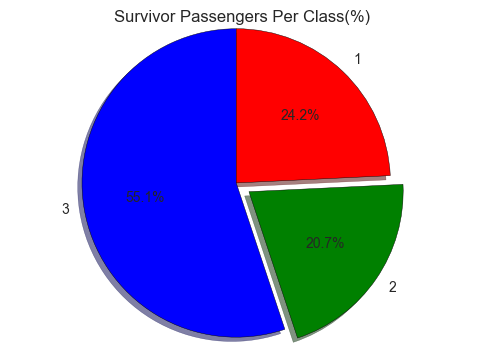

In [68]:
#Constructing a data frame 
%matplotlib inline

passenger_per_class_df = pd.DataFrame(data={'Passengers Per Class': passengers_per_class, 'Passengers Per Class %':passengers_per_class_percentage })
passenger_per_class_df

pie_plot(passengers_per_class_percentage, "Survivor Passengers Per Class(%)")

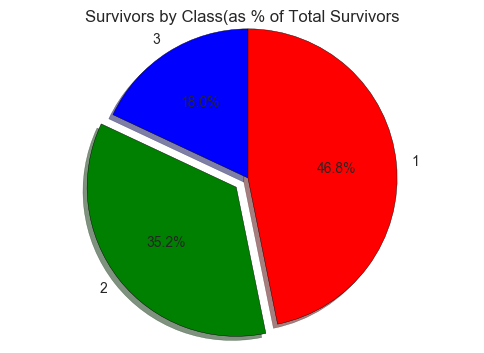

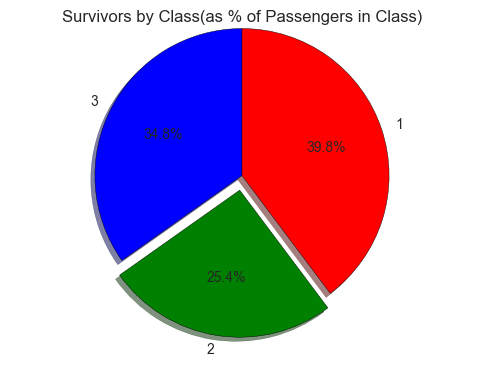

In [69]:
#Group passengers by survivors

survivors_by_class = passenger_df.groupby(['Pclass']).sum()['Survived']
survivors_by_class_as_percentage_total_survival = get_percentage(survivors_by_class,passenger_df['Survived'].sum())
#passenger_df.head()
survivors_by_class_as_percentage_total_survival

survivors_by_class_as_percentage_of_passengers_in_class = get_percentage(survivors_by_class,passengers_per_class)
survivors_by_class_as_percentage_of_passengers_in_class

survivors_df = pd.DataFrame( data = {"Survivors by Class(Abs)" : survivors_by_class, 
        'Survivors by Class(as % of Total Survivors)' : survivors_by_class_as_percentage_total_survival,
        'Survivors by Class(as % of Passengers in Class)' : survivors_by_class_as_percentage_of_passengers_in_class
         } )


pie_plot(survivors_by_class_as_percentage_of_passengers_in_class, 'Survivors by Class(as % of Total Survivors')
pie_plot(survivors_by_class_as_percentage_total_survival,'Survivors by Class(as % of Passengers in Class)')